In [1]:
from load_and_reduce import load_and_reduce
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sns

goodgreen = "#18453B"
goodlightblue = "#32dde3"
goodpurple = "#6d0585"
burntred = "#8a0303"

In [2]:
intake_path = "Austin_Animal_Center_Intakes.csv"
outcome_path = "Austin_Animal_Center_Outcomes.csv"

X, y = load_and_reduce(intake_path, outcome_path, coding = None, scale = False, DimRed = "None")

X.head()

Begin Feature Engineering

Starting Cardinality of Breed 2419
Starting Cardinality of Color 562

Cardinality of Breed After Removing Mix and / 246
Cardinality of Color After Removing / 58

Cardinality of Breed After Boiling Down Rare Breeds 105
Cardinality of Color After Boiling Down Rare Colors 41

Total Dimensions of X before Encoding (103049, 12)
Final Dimensions of X (103049, 12)


,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Breed,Color,Outcome Type,Sex upon Outcome,Age (Days),Mix_Breed,Mix_Color,Sex_Changed
1,Stray,Normal,Cat,Unknown,Domestic Shorthair,Orange,Transfer,Unknown,7.0,1,1,0
2,Stray,Normal,Cat,Unknown,Domestic Shorthair,Orange,Transfer,Unknown,7.0,1,1,0
3,Stray,Normal,Cat,Unknown,Domestic Shorthair,Orange,Transfer,Unknown,7.0,1,1,0
13,Stray,Normal,Dog,Spayed Female,Anatol Shepherd,White,Return to Owner,Spayed Female,365.0,1,1,0
14,Stray,Normal,Dog,Neutered Male,Weimaraner,Silver,Return to Owner,Neutered Male,2555.0,1,0,0


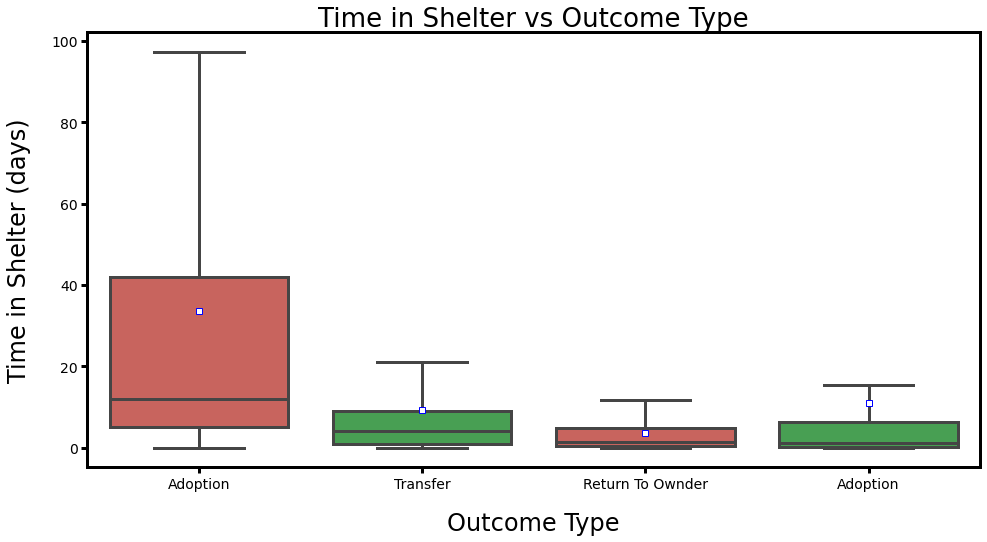

In [3]:
time_transfer = y[X['Outcome Type']=="Transfer"]
time_return = y[X['Outcome Type']=="Return to Owner"]
time_adoption = y[X['Outcome Type']=="Adoption"]
time_euthanasia = y[X['Outcome Type']=="Euthanasia"]

fig, ax = plt.subplots(figsize = (16,8))

sns.boxplot(
    data=[time_adoption, time_transfer, time_return, time_euthanasia],
    palette=[sns.xkcd_rgb["pale red"], sns.xkcd_rgb["medium green"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["medium green"]],
    showmeans=True,
    meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"blue"},
    showfliers=False,
    linewidth = 3,
    
)

plt.xlabel("Outcome Type",fontsize = 24, labelpad = 20)
plt.ylabel("Time in Shelter (days)", fontsize = 24, labelpad = 20)
plt.title("Time in Shelter vs Outcome Type", fontsize = 26)

plt.tick_params(length = 6, width = 3)

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(3)

plt.xticks(np.arange(4), ['Adoption', 'Transfer', 'Return To Ownder',"Adoption"],fontsize = 14) 
plt.yticks(fontsize = 14)

plt.savefig("./figures/outcometype_timein_box.png", dpi = 400)
